# Reduce list of authors

In [1]:
import numpy as np
import cPickle as pickle
import pandas as pd
import collections
import glob
import seaborn as sns

%matplotlib inline

In [2]:
author_to_pmids = pickle.load(open("../data/pubmed_author_to_pmids.pkl", 'r'))

In [9]:
all_authors = set(author_to_pmids.keys())

In [14]:
authors_to_initial = {}
all_authors_initial = set()
for au in all_authors:
    try:
        firstname = au.split(',')[1].split(' ')
        initials = ' '.join([x[0] for x in firstname])
        newname = ','.join([au.split(',')[0], initials])
        all_authors_initial.add(newname)
        
        authors_to_initial[au] = newname
    except:
        continue

In [15]:
len(all_authors_initial)

8158637

In [17]:
list(all_authors_initial)[:20]

['Babine,A M',
 'Naumann-Bartsch,N',
 'Rempas,S P',
 'Vrtis,J',
 'Ongkorahadjo,A',
 'Collen,E B',
 'Moo,I',
 u'Domonkosov\xe1,A',
 'Escalona,L',
 'Carballo-Costa,L',
 'DERGANC,M',
 'Henricks Holtz,S',
 'DERGANC,K',
 'G Nicolau,B',
 'Vrtis,V',
 'DERGANC,F',
 'Vrtis,R',
 'Lustgarten,B P',
 'Haiyong,Z',
 'SCHNEIDER-REINKENS,A']

In [18]:
lastname_to_count = collections.defaultdict(lambda: 0)
for au in all_authors_initial:
    lastname_to_count[au.split(',')[0]] += 1

In [24]:
unique_author_to_pmids = {}
for au in all_authors:
    if lastname_to_count[au.split(',')[0]] == 1:
        try:
            pmids = author_to_pmids.get(au, [])
            pmids.extend(unique_author_to_pmids.get(authors_to_initial[au], []))
            unique_author_to_pmids[au] = pmids
        except:
            continue

In [25]:
len(unique_author_to_pmids)

1926890

In [26]:
unique_author_to_pmids.keys()[1:20]

['Naumann-Bartsch,N',
 'Ben-Tekaya,Houchaima',
 'MARKOVIC-GIAJA,L',
 'Kapravelos,N',
 'G Ennas,Maria',
 u'Domonkosov\xe1,A',
 u'S\xe1nchez Beorlegui,Jes\xfas',
 'Davidow Hirshbein,Laura',
 "Monforte d'Arminio,Antonella",
 'Henricks Holtz,S',
 'Kaltunas,Jennifer',
 'Ringdal Pedersen,Eva',
 'PAWLOWSKA-BYCHOWSKA,I',
 "Puoris'haag,Mehron",
 'Navui,S A',
 'Bello-Novoa,Betsy',
 'Hronowsky,Xiaoping',
 'SCHNEIDER-REINKENS,A',
 'Grueiro-Noche,G']

In [46]:
num_papers = []
for au in unique_author_to_pmids:
    num_papers.append(len(set(unique_author_to_pmids[au])))

num_papers = np.array(num_papers)
np.sum(num_papers > 2)

In [44]:
unique_author_to_pmids_3 = {}
for au in unique_author_to_pmids:
    papers = unique_author_to_pmids[au]
    if len(set(papers)) > 2: unique_author_to_pmids_3[au] = list(set(papers))

In [62]:
unique_author_to_pmids_3["Boykevisch,Sean"]

[(15507210, 3, 6),
 (17084704, 1, 7),
 (18454158, 3, 7),
 (19883123, 2, 7),
 (15878843, 3, 5)]

In [52]:
pickle.dump(unique_author_to_pmids_3, open("../data/unique_author_to_pmids_3.pkl", 'w'))

In [71]:
# Get PMID to year data for all papers
pmid_to_yr = {}
ctr = 0
for fn in glob.glob("../data/pubmed_statistics/pubmed_statistics*.pkl"):
    print fn

    data = pickle.load(open(fn, 'r'))
    for rec in data:
        try:
            pmid_to_yr[rec] = data[rec][1]   
        except:
            continue

../data/pubmed_statistics/pubmed_statistics_1100.pkl
../data/pubmed_statistics/pubmed_statistics_2000.pkl
../data/pubmed_statistics/pubmed_statistics_500.pkl
../data/pubmed_statistics/pubmed_statistics_2800.pkl
../data/pubmed_statistics/pubmed_statistics_2400.pkl
../data/pubmed_statistics/pubmed_statistics_2900.pkl
../data/pubmed_statistics/pubmed_statistics_1500.pkl
../data/pubmed_statistics/pubmed_statistics_1700.pkl
../data/pubmed_statistics/pubmed_statistics_700.pkl
../data/pubmed_statistics/pubmed_statistics_2300.pkl
../data/pubmed_statistics/pubmed_statistics_300.pkl
../data/pubmed_statistics/pubmed_statistics_400.pkl
../data/pubmed_statistics/pubmed_statistics_2100.pkl
../data/pubmed_statistics/pubmed_statistics_200.pkl
../data/pubmed_statistics/pubmed_statistics_2500.pkl
../data/pubmed_statistics/pubmed_statistics_600.pkl
../data/pubmed_statistics/pubmed_statistics_1400.pkl
../data/pubmed_statistics/pubmed_statistics_1300.pkl
../data/pubmed_statistics/pubmed_statistics_1200.pkl

In [90]:
pickle.dump(pmid_to_yr, open("../data/pmid_to_yr.pkl", 'w'))

In [5]:
# If running analysis again, open these 3 files
pmid_to_yr = pickle.load(open("../data/pmid_to_yr.pkl", 'r'))
unique_author_to_pmids_3 = pickle.load(open("../data/unique_author_to_pmids_3.pkl", 'r'))
case_reports = set(pickle.load(open("../data/case_report_pmids.pkl", 'r')))

In [19]:
unique_author_to_pmids_3_yr = {}
for au in unique_author_to_pmids_3:
    papers = unique_author_to_pmids_3[au]
    papers_with_yrs = []
    for paper in papers:
        try:
            if paper[0] in case_reports: continue  # remove papers that are case reports
            paper = list(paper)
            paper.append(pmid_to_yr[paper[0]])
            
            if paper[-1] >= 2014: continue  # to mimic the Current Bio dataset
            papers_with_yrs.append(paper)

        except:
            continue
    if len(papers_with_yrs) == 0: continue  # if all of an author's papers were case reports, we get rid of the author
        
    sorted_papers = sorted(papers_with_yrs, key=lambda x: x[-1])
    if sorted_papers[0][-1] > 2000 or sorted_papers[0][-1] < 1996: continue  # first paper between 1996 and 2000

    ctr_last = 0
    for paper in sorted_papers[:4]:
        if paper[1] == paper[2]: ctr_last += 1
    if ctr_last >= 2: continue  # at least 2 of first 4 pubs were last author

    unique_author_to_pmids_3_yr[au] = sorted_papers

In [21]:
len(unique_author_to_pmids_3_yr.keys())

35753

In [9]:
unique_author_to_pmids_3_yr["Galijatovic,Alema"]

[[9097232, 2, 6, 1996],
 [9541408, 7, 10, 1998],
 [10424761, 2, 3, 1999],
 [10950852, 3, 5, 2000],
 [10714603, 1, 3, 2000],
 [10647910, 1, 4, 2000],
 [11442279, 1, 4, 2001],
 [12042666, 2, 9, 2002],
 [15037607, 1, 10, 2004],
 [15630080, 3, 4, 2005]]

In [23]:
# figuring out PI status
pi_history = {}
pi_years = []
for au in unique_author_to_pmids_3_yr:
    ctr_last = 0
    papers = unique_author_to_pmids_3_yr[au]
    pi = 0
    start = papers[0][-1]
    for paper in papers:
        if paper[1] == paper[2]: ctr_last += 1
        if ctr_last == 2:
            pi = paper[-1]  # take the date of the second last author paper
    years = pi - start if pi != 0 else 0
    
    # remove PIs with less than 3 last author papers
    if ctr_last < 3: 
        pi = 0
        years = 0

    pi_history[au] = (pi, start, years)
    
    if years != 0: pi_years.append(years)

In [24]:
len(pi_years)

2916

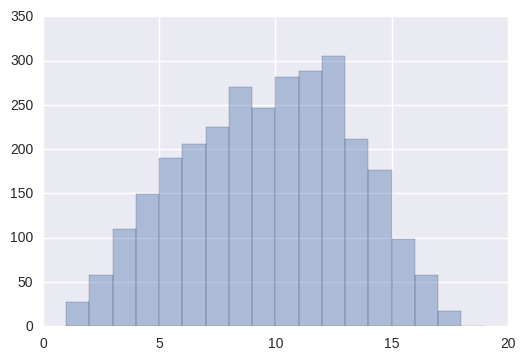

In [25]:
sns.distplot(pi_years, kde=False, bins=range(20))